Padded

In [1]:
import os
import cv2
import json
import tensorflow as tf
import numpy as np
from sklearn.model_selection import train_test_split
import keras
from tensorflow.keras import layers, models, losses, optimizers, ops
from tensorflow.keras.datasets import cifar10

2024-12-25 13:59:25.905019: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-12-25 13:59:25.907848: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-12-25 13:59:25.915896: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1735115365.929666    6983 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1735115365.933482    6983 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-12-25 13:59:25.947969: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU ins

In [2]:
data_folder = "/media/arush/New Volume/Work/Giloma_Kaggle/Data/Glioma_MDC_2025_training/Glioma_MDC_2025_training"

In [3]:
INP_SIZE = (300, 300)
TARGET_SIZE = (150, 150)
INTERPOLATION = "bilinear"

AUTO = tf.data.AUTOTUNE
BATCH_SIZE = 64
EPOCHS = 5

In [6]:
def loader_padded(image_path,json_path):
    # Load the image
    image = cv2.imread(image_path)

    json_path = os.path.join(data_folder,json_path)
    # Load and parse the JSON file
    with open(json_path, "r") as f:
        data = json.load(f)

    # Extract polygon points
    polygon_points = data["shapes"][0]["points"]
    polygon_points = np.array(polygon_points, dtype=np.int32)

    # Create a mask for the polygon
    mask = np.zeros(image.shape[:2], dtype=np.uint8)
    cv2.fillPoly(mask, [polygon_points], 255)

    # Extract the ROI using the mask
    roi = cv2.bitwise_and(image, image, mask=mask)

    # Crop the bounding rectangle around the polygon
    x, y, w, h = cv2.boundingRect(polygon_points)
    cropped_roi = roi[y : y + h, x : x + w]

    return cropped_roi

In [10]:
images = []
labels = []

# Load image and JSON files
for file in sorted(os.listdir(data_folder)):
    if file.endswith(".jpg"):        


        # Load the corresponding JSON file
        json_file = file.replace(".jpg", ".json")
        json_path = os.path.join(data_folder, json_file)
        with open(json_path, "r") as f:
            data = json.load(f)

        # Load the image
        img_path = os.path.join(data_folder, file)
        image = cv2.imread(img_path)
        if image is None:
            print(f"Failed to load image at path: {img_path}")
            continue


        # Extract polygon points
        polygon_points = data["shapes"][0]["points"]
        polygon_points = np.array(polygon_points, dtype=np.int32)

        # Create a mask for the polygon
        mask = np.zeros(image.shape[:2], dtype=np.uint8)
        cv2.fillPoly(mask, [polygon_points], 255)

        # Extract the ROI using the mask
        roi = cv2.bitwise_and(image, image, mask=mask)

        # Crop the bounding rectangle around the polygon
        x, y, w, h = cv2.boundingRect(polygon_points)
        img = roi[y : y + h, x : x + w]
        print("path = " , img_path, " shape = ", img.shape)

    #    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB
        img = ops.image.resize(img, (INP_SIZE[0], INP_SIZE[1]))
   
        

        try: 
            label = data["shapes"][0]["label"]  # Modify as needed
                    
            if label == "Mitosis":
                label = 1
            else:   
                label = 0   

            labels.append(label)
            images.append(img)        
            
        except:
            print(f"No label found for image at path: {img_path}")
            continue


path =  /media/arush/New Volume/Work/Giloma_Kaggle/Data/Glioma_MDC_2025_training/Glioma_MDC_2025_training/training0001.jpg  shape =  (25, 26, 3)
path =  /media/arush/New Volume/Work/Giloma_Kaggle/Data/Glioma_MDC_2025_training/Glioma_MDC_2025_training/training0002.jpg  shape =  (55, 8, 3)
path =  /media/arush/New Volume/Work/Giloma_Kaggle/Data/Glioma_MDC_2025_training/Glioma_MDC_2025_training/training0003.jpg  shape =  (47, 46, 3)
path =  /media/arush/New Volume/Work/Giloma_Kaggle/Data/Glioma_MDC_2025_training/Glioma_MDC_2025_training/training0004.jpg  shape =  (48, 46, 3)
path =  /media/arush/New Volume/Work/Giloma_Kaggle/Data/Glioma_MDC_2025_training/Glioma_MDC_2025_training/training0005.jpg  shape =  (0, 0, 3)


InvalidArgumentError: {{function_node __wrapped__ResizeBilinear_device_/job:localhost/replica:0/task:0/device:CPU:0}} input image must be of non-zero size [Op:ResizeBilinear] name: 

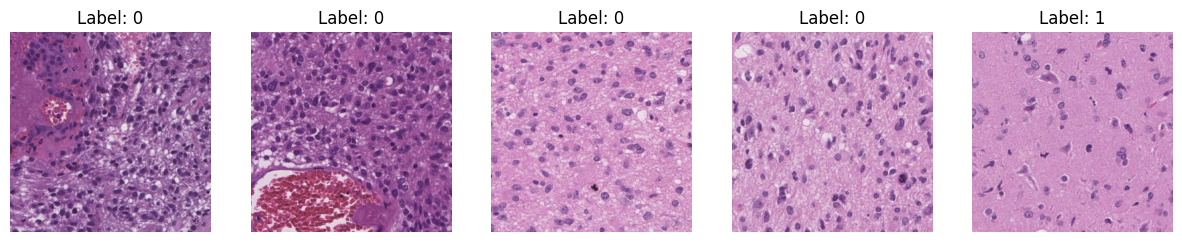

In [6]:
import matplotlib.pyplot as plt

def display_images(images, labels, num_images=5):
    """
    Display a grid of images with their corresponding labels.
    
    Parameters:
    - images: List or NumPy array of images
    - labels: List or NumPy array of labels
    - num_images: Number of images to display
    """
    plt.figure(figsize=(15, 5))
    
    for i in range(num_images):
        plt.subplot(1, num_images, i + 1)
        plt.imshow(images[i])  # Show the image
        plt.title(f"Label: {labels[i]}")  # Display the label as title
        plt.axis("off")  # Hide axes
    
    plt.show()

# Display the first 5 images in the dataset
display_images(images, labels, num_images=5)

In [ ]:
# Normalize images and prepare as TensorFlow Tensors
images = np.array(images, dtype=np.float32) / 255.0  # Normalize to [0, 1]
labels = np.array(labels, dtype=np.float32)


In [ ]:
len(images), len(labels)

In [19]:

# Split the data into training and validation sets

x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

del images, labels


In [20]:
def conv_block(x, filters, kernel_size, strides, activation=layers.LeakyReLU(0.2)):
    x = layers.Conv2D(filters, kernel_size, strides, padding="same", use_bias=False)(x)
    x = layers.BatchNormalization()(x)
    if activation:
        x = activation(x)
    return x


def res_block(x):
    inputs = x
    x = conv_block(x, 16, 3, 1)
    x = conv_block(x, 16, 3, 1, activation=None)
    return layers.Add()([inputs, x])

    # Note: user can change num_res_blocks to >1 also if needed


def get_learnable_resizer(filters=16, num_res_blocks=1, interpolation=INTERPOLATION):
    inputs = layers.Input(shape=[None, None, 3])

    # First, perform naive resizing.
    naive_resize = layers.Resizing(*TARGET_SIZE, interpolation=interpolation)(inputs)

    # First convolution block without batch normalization.
    x = layers.Conv2D(filters=filters, kernel_size=7, strides=1, padding="same")(inputs)
    x = layers.LeakyReLU(0.2)(x)

    # Second convolution block with batch normalization.
    x = layers.Conv2D(filters=filters, kernel_size=1, strides=1, padding="same")(x)
    x = layers.LeakyReLU(0.2)(x)
    x = layers.BatchNormalization()(x)

    # Intermediate resizing as a bottleneck.
    bottleneck = layers.Resizing(*TARGET_SIZE, interpolation=interpolation)(x)

    # Residual passes.
    # First res_block will get bottleneck output as input
    x = res_block(bottleneck)
    # Remaining res_blocks will get previous res_block output as input
    for _ in range(num_res_blocks - 1):
        x = res_block(x)

    # Projection.
    x = layers.Conv2D(
        filters=filters, kernel_size=3, strides=1, padding="same", use_bias=False
    )(x)
    x = layers.BatchNormalization()(x)

    # Skip connection.
    x = layers.Add()([bottleneck, x])

    # Final resized image.
    x = layers.Conv2D(filters=3, kernel_size=7, strides=1, padding="same")(x)
    final_resize = layers.Add()([naive_resize, x])

    return keras.Model(inputs, final_resize, name="learnable_resizer")


learnable_resizer = get_learnable_resizer()


In [21]:
def get_model():
    backbone = keras.applications.DenseNet121(
        weights=None,
        include_top=True,
        classes=2,
        input_shape=((TARGET_SIZE[0], TARGET_SIZE[1], 3)),
    )
    backbone.trainable = True

    inputs = layers.Input((INP_SIZE[0], INP_SIZE[1], 3))
    x = layers.Rescaling(scale=1.0 / 255)(inputs)
    x = learnable_resizer(x)
    x = backbone(x)
    outputs = layers.Dense(1, activation="sigmoid")(x) 

    return keras.Model(inputs, outputs)


In [ ]:
model = get_model()
model.compile(
    loss=keras.losses.CategoricalCrossentropy(label_smoothing=0.1),
    optimizer="sgd",
    metrics=["accuracy"],
)

model.fit(
    x_train, y_train,
    validation_data=(x_test, y_test),
    epochs=EPOCHS,
    batch_size=32
)